## CEMENT STRENGTH PREDICTION MODEL

<div style="text-align: center;"> <img src="https://icid2019.com/wp-content/uploads/2023/10/Concrete.jpg" width="1000" /> </div>

The dataset contains various material compositions used in concrete mixtures and their corresponding compressive strength. The goal is to predict the compressive strength of concrete based on its composition and curing time.This can help civil engineers and construction companies optimize concrete mixtures for better durability and cost efficiency.

1. cement (kg/m³) :- Amount of cement used in the concrete mix. A key binding material.
2. blast_furnace_slag (kg/m³) :- A byproduct of steel production, used as a substitute for cement to improve strength.
3. fly_ash (kg/m³) :- A waste material from coal combustion, improves durability and workability.
4. water (kg/m³) :- The amount of water in the mix, which affects workability and strength.
5. superplasticizer (kg/m³) :- Chemical additives that increase fluidity without affecting strength.
6. coarse_aggregate (kg/m³) :-	Large-sized aggregate (gravel/stones) that provides bulk and strength.
7. fine_aggregate (kg/m³) :- Small particles (sand) that fill gaps between coarse aggregates.
8. age (days) :- Number of days the concrete has been cured (e.g., 28, 90, 365 days).
9. concrete_compressive_strength (MPa) Target Variable :- The strength of concrete after curing, measured in Megapascals (MPa).

# Applications of the Project
- Construction Industry: Helps engineers design optimized concrete mixtures.
- Cost Reduction: Reduce excess use of cement while maintaining strength.
- Sustainability: Promotes the use of industrial byproducts like fly ash and slag.
- Quality Control: Predict compressive strength without destructive testing.

In [70]:
# Import Data Manupulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Lib
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Library
import warnings
warnings.filterwarnings ('ignore')

# Import ScikitLearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error

# Costomize Descriptive Stats
from collections import OrderedDict

In [71]:
# Import Dataset using pandas
df = pd.read_csv('concrete_data.csv')

In [72]:
# Uderstand Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


- In Data there are 1030 rows and 9 columns.
- No null(missing) values are present.
- All columns are numerical.

In [73]:
df.sample(frac=1)  # Shuffels the data

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
152,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
170,388.6,97.1,0.0,157.9,12.1,852.1,925.7,91,57.60
469,194.7,0.0,100.5,170.2,7.5,998.0,901.8,100,44.28
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
131,379.5,151.2,0.0,153.9,15.9,1134.3,605.0,28,52.20
...,...,...,...,...,...,...,...,...,...
56,475.0,0.0,0.0,228.0,0.0,932.0,594.0,365,41.93
661,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7,10.39
71,313.3,262.2,0.0,175.5,8.6,1046.9,611.8,3,28.80
438,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,28,41.41


In [74]:
# Univariate Analysis
stats = []

for i in df.columns:
  numerical_stats = OrderedDict({
      'Feature' : i,
      'Max' : df[i].max(),
      'Min' : df[i].min(),
      'Mean' : df[i].mean(),
      'Median' : df[i].median(),
      'Standard Deviation' : df[i].std(),
      'Variance' : df[i].var(),
      'Skewness' : df[i].skew(),
      'Kurtosis' : df[i].kurt(),
      '25%' : df[i].quantile(0.25),
      '75%' : df[i].quantile(0.75),
      'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25)
  })

  stats.append(numerical_stats)
report = pd.DataFrame(stats)
report.T

,0,1,2,3,4,5,6,7,8
Feature,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
Max,540.0,359.4,200.1,247.0,32.2,1145.0,992.6,365.0,82.6
Min,102.0,0.0,0.0,121.8,0.0,801.0,594.0,1.0,2.33
Mean,281.167864,73.895825,54.18835,181.567282,6.20466,972.918932,773.580485,45.662136,35.817961
Median,272.9,22.0,0.0,185.0,6.4,968.0,779.5,28.0,34.445
Standard Deviation,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.17598,63.169912,16.705742
Variance,10921.58022,7444.124812,4095.616541,456.002651,35.686781,6045.677357,6428.187792,3990.437729,279.081814
Skewness,0.509481,0.800717,0.537354,0.074628,0.907203,-0.04022,-0.25301,3.269177,0.416977
Kurtosis,-0.520652,-0.508175,-1.328746,0.122082,1.411269,-0.599016,-0.102177,12.168989,-0.313725
25%,192.375,0.0,0.0,164.9,0.0,932.0,730.95,7.0,23.71


- Data is non normally distributed.
- Data is Skewed.

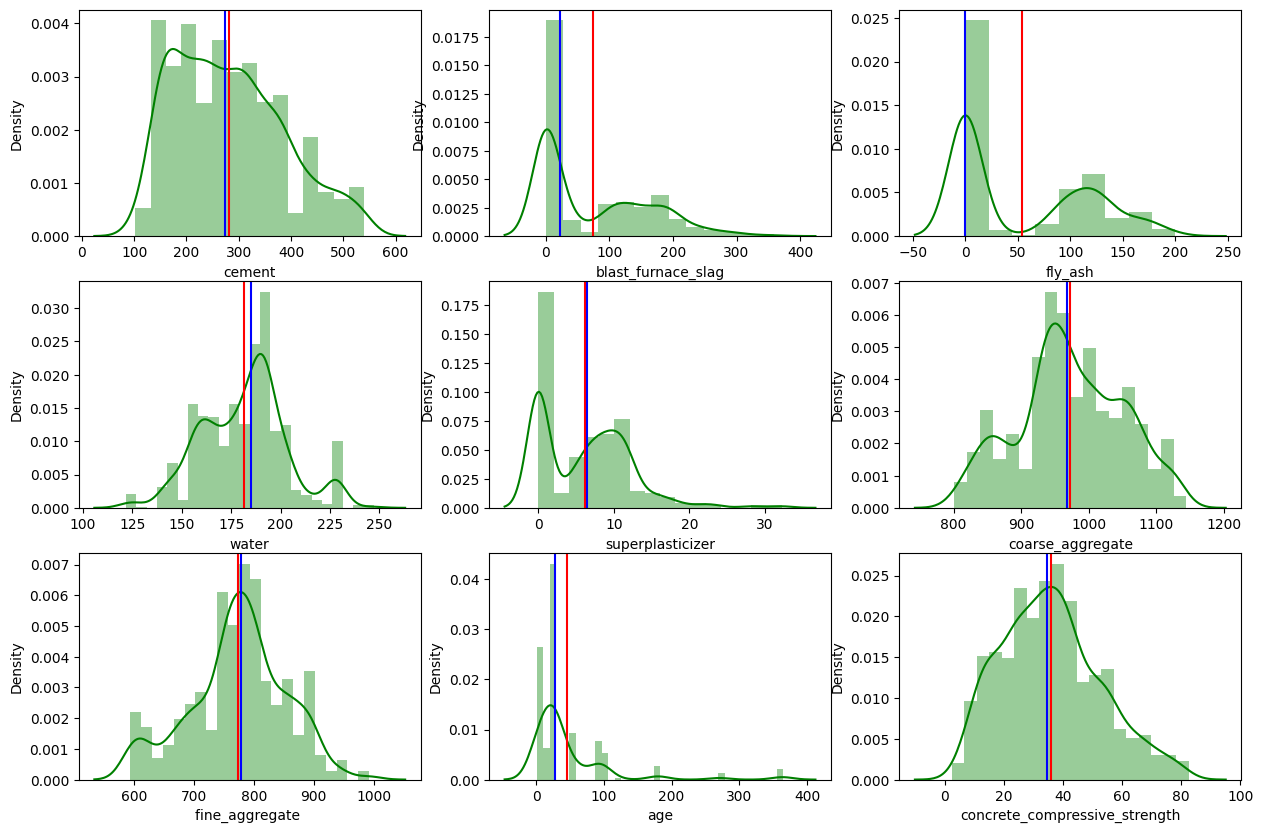

In [75]:
# Checking Data Distribution(Skewness) through Visualization

plt.figure(figsize = (15,10))
plot = 0
for i in df.columns:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.distplot(df[i], hist=True, color='green')
    plt.axvline(df[i].mean(), color='red', label='Mean')
    plt.axvline(df[i].median(), color='blue', label='Median')
plt.show()

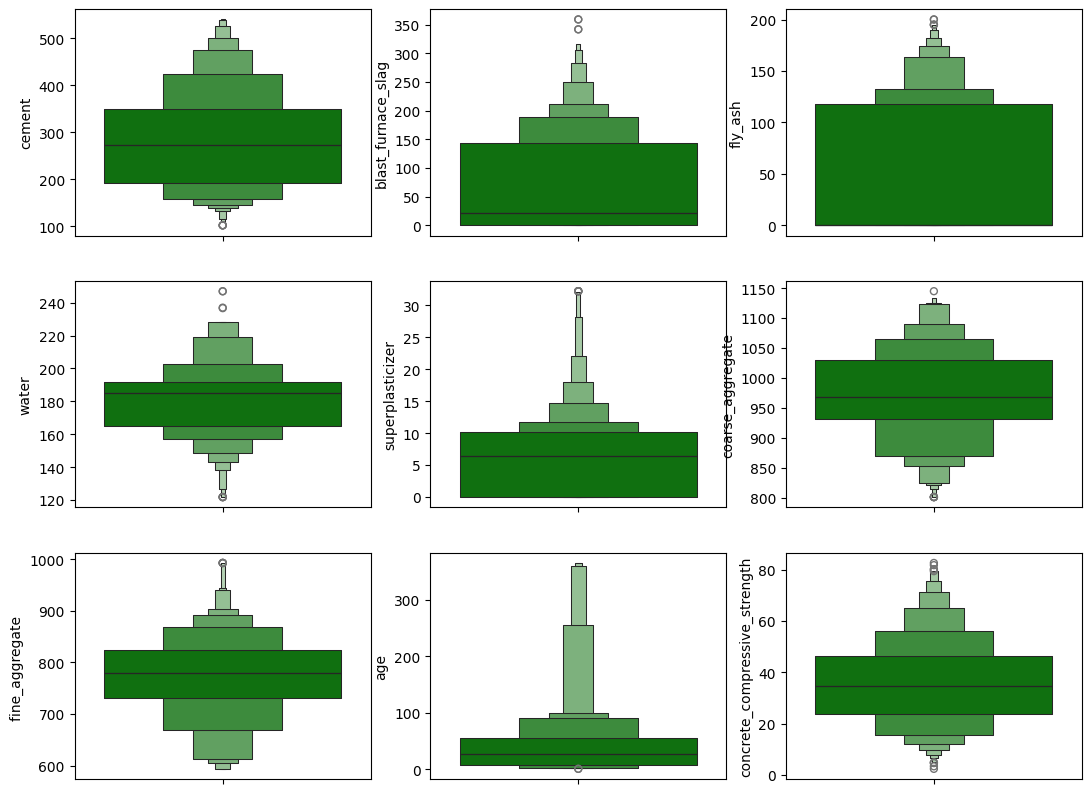

In [76]:
plt.figure(figsize = (13,10))
plot = 0
for i in df.columns:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.boxenplot(df[i], color='green')
plt.show()

- Outliers are present in data.
- The outliers are not random anomalies but reflect real-world mix designs.
- They align with concrete material variations used in construction and research.
- Removing them might discard valuable information about high-performance concrete.

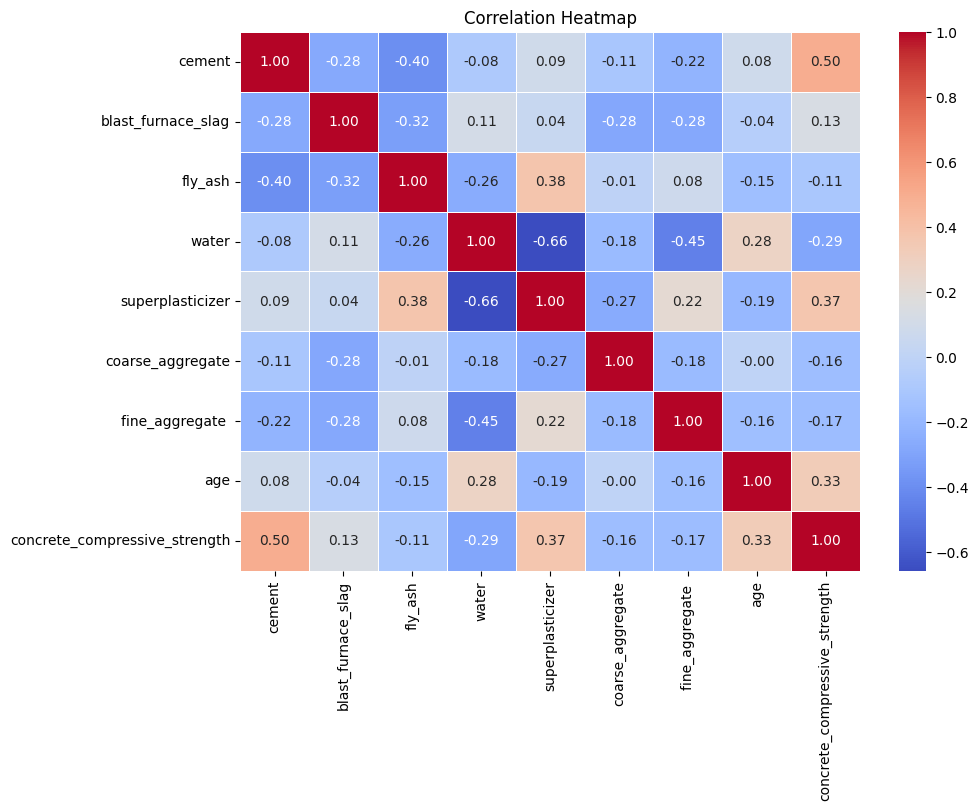

In [77]:
# Heatmap for correlation

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [78]:
# Cheking Column nmaes
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [79]:
# Feature Engingeering

df['comp'] = (df['cement'] + df['blast_furnace_slag'] + df['superplasticizer']) / df['water']

- Checked the correlation between the columns to see how the feature columns are affected with the
target column.

In [80]:
print(df.corr()['concrete_compressive_strength'])

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
comp                             0.620196
Name: concrete_compressive_strength, dtype: float64


In [81]:
X = df.drop(columns = ['concrete_compressive_strength'])
y = df['concrete_compressive_strength']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

In [82]:
from sklearn.preprocessing import PowerTransformer
"""PowerTransformer is a feature transformation technique used to make data more normally distributed, improving the performance of ML models
 and make data more Gaussian-like."""

scalar = PowerTransformer(method='yeo-johnson')
X_train_transformed = scalar.fit_transform(X_train)
X_test_transformed = scalar.transform(X_test)

## Data distribution with histograms before and after transformation

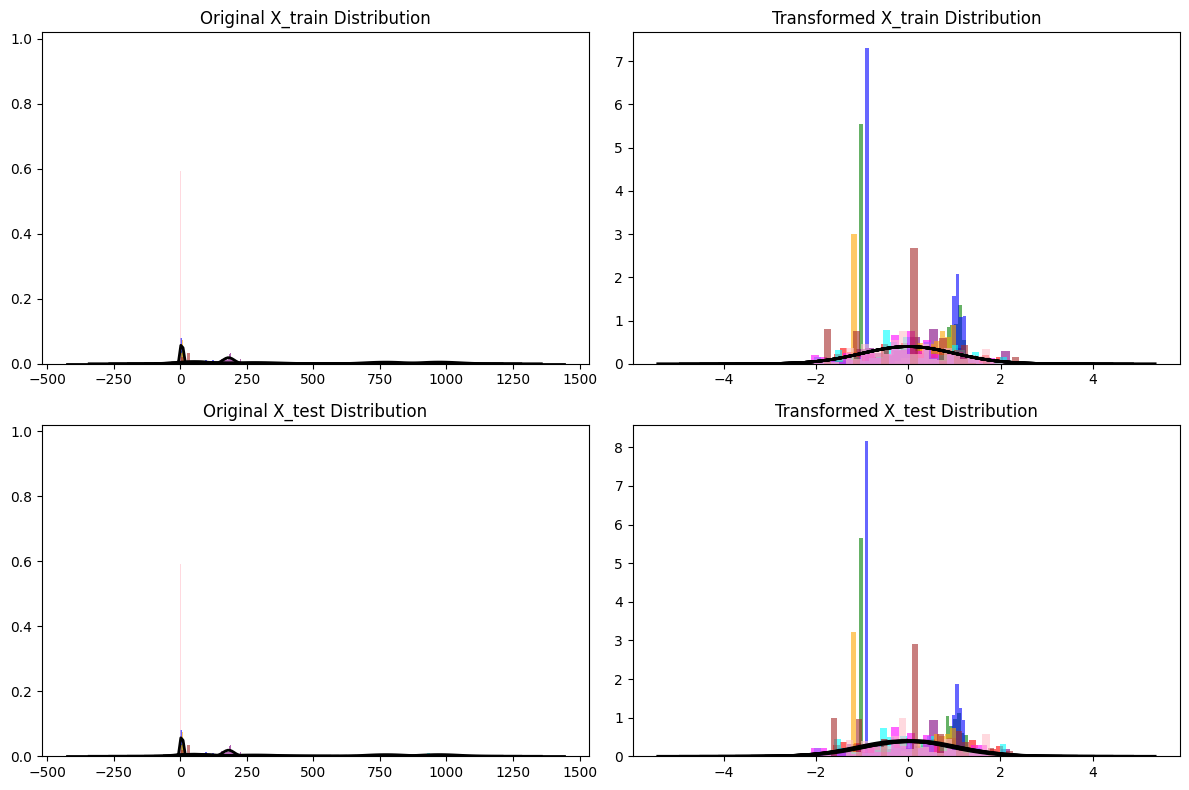

In [93]:

from scipy.stats import norm

# Number of features in the dataset
num_features = X_train.shape[1]

# Creating subplots for each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  

# Colors for multiple features
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink']

# Iterate over features
for i in range(num_features):
    # Original X_train Distribution
    axes[0, 0].hist(X_train.iloc[:, i], bins=30, density=True, alpha=0.6, color=colors[i % len(colors)])
    xmin, xmax = axes[0, 0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    axes[0, 0].plot(x, norm.pdf(x, np.mean(X_train.iloc[:, i]), np.std(X_train.iloc[:, i])), 'k', linewidth=2)
    axes[0, 0].set_title("Original X_train Distribution")

    # Transformed X_train Distribution
    axes[0, 1].hist(X_train_transformed[:, i], bins=30, density=True, alpha=0.6, color=colors[i % len(colors)])
    xmin, xmax = axes[0, 1].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    axes[0, 1].plot(x, norm.pdf(x, np.mean(X_train_transformed[:, i]), np.std(X_train_transformed[:, i])), 'k', linewidth=2)
    axes[0, 1].set_title("Transformed X_train Distribution")

    # Original X_test Distribution
    axes[1, 0].hist(X_train.iloc[:, i], bins=30, density=True, alpha=0.6, color=colors[i % len(colors)])
    xmin, xmax = axes[1, 0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    axes[1, 0].plot(x, norm.pdf(x, np.mean(X_train.iloc[:, i]), np.std(X_train.iloc[:, i])), 'k', linewidth=2)
    axes[1, 0].set_title("Original X_test Distribution")

    # Transformed X_test Distribution
    axes[1, 1].hist(X_test_transformed[:, i], bins=30, density=True, alpha=0.6, color=colors[i % len(colors)])
    xmin, xmax = axes[1, 1].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    axes[1, 1].plot(x, norm.pdf(x, np.mean(X_test_transformed[:, i]), np.std(X_test_transformed[:, i])), 'k', linewidth=2)
    axes[1, 1].set_title("Transformed X_test Distribution")

plt.tight_layout()
plt.show()



In [84]:
models = {
'Linear Regression': LinearRegression(),
'DecisionTree Regressor': DecisionTreeRegressor(),
'SVM': SVR(),
'RandomForest Regressor': RandomForestRegressor()
}
for i in models:
    model = models[i]
    model.fit(X_train_transformed,y_train)
    y_pred = model.predict(X_test_transformed)
    print('Model: ',i)
    print('Mean absolute error',mean_absolute_error(y_test,y_pred))
    print('Mean squared error',mean_squared_error(y_test,y_pred))
    print('r2 score',r2_score(y_test,y_pred))
    print('*'*50)


Model:  Linear Regression
Mean absolute error 5.550949338669348
Mean squared error 53.44752356603366
r2 score 0.823247029382129
**************************************************
Model:  DecisionTree Regressor
Mean absolute error 4.009595469255663
Mean squared error 37.31503017799352
r2 score 0.8765977917665884
**************************************************
Model:  SVM
Mean absolute error 5.963459067563045
Mean squared error 68.00362652372839
r2 score 0.775109449439563
**************************************************
Model:  RandomForest Regressor
Mean absolute error 3.482423960291779
Mean squared error 26.605514541722247
r2 score 0.9120145627653566
**************************************************


In [96]:
model = RandomForestRegressor()
model.fit(X_train_transformed,y_train)
y_pred2 = model.predict(X_test_transformed)

In [97]:
# Training accuracy
model.score(X_train_transformed,y_train)

0.9830632187405374

In [98]:
# Testing accuracy
model.score(X_test_transformed,y_test)

0.9142676628682347

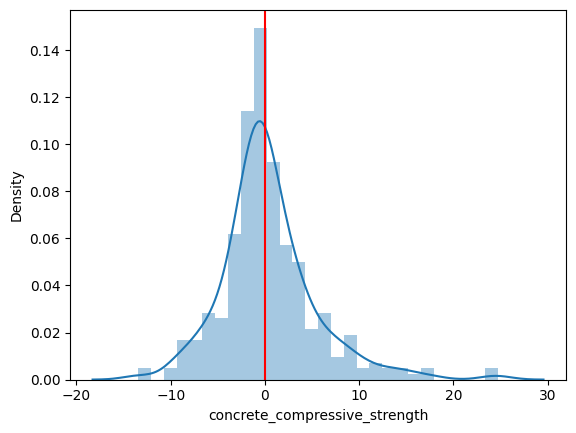

In [99]:
sns.distplot(y_test - y_pred2)
plt.axvline(0,color = 'red')
plt.show()

## Using ANN Technique

In [89]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [90]:
model_ann = Sequential()
model_ann.add(Dense(128,activation='relu',input_dim = 9))
model_ann.add(Dense(64,activation='relu'))
model_ann.add(Dense(32,activation='relu'))
model_ann.add(Dense(16,activation='relu'))
model_ann.add(Dense(1,activation='linear'))

In [94]:
model_ann.compile(optimizer='adam',loss='mse',metrics=['mae'])
model_ann.fit(X_train_transformed,y_train,epochs=1000,batch_size=32)

Epoch 1/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1502.9655 - mae: 35.0947
Epoch 2/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1381.9093 - mae: 33.5391
Epoch 3/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 802.1927 - mae: 24.0601
Epoch 4/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 172.6154 - mae: 10.3969
Epoch 5/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 104.5958 - mae: 8.3138
Epoch 6/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 83.6800 - mae: 7.2596
Epoch 7/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 75.3801 - mae: 6.7360
Epoch 8/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 64.9298 - mae: 6.2960
Epoch 9/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 64.1820 - mae: 6.2444
Epoch 10/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 57.8200 - mae: 5.8284
Epoch 11/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 54.7912 - mae: 5.7479
Epoch 12/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 56.0191 - mae: 5.671

In [95]:
model_ann.summary()

# Predictions
y_pred_ann = model_ann.predict(X_test_transformed)

mse = mean_squared_error(y_test, y_pred_ann)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_ann)
r2 = r2_score(y_test, y_pred_ann)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,485 (142.52 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,324 (95.02 KB)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
RMSE: 5.8236
MAE: 3.1329
R² Score: 0.8878
